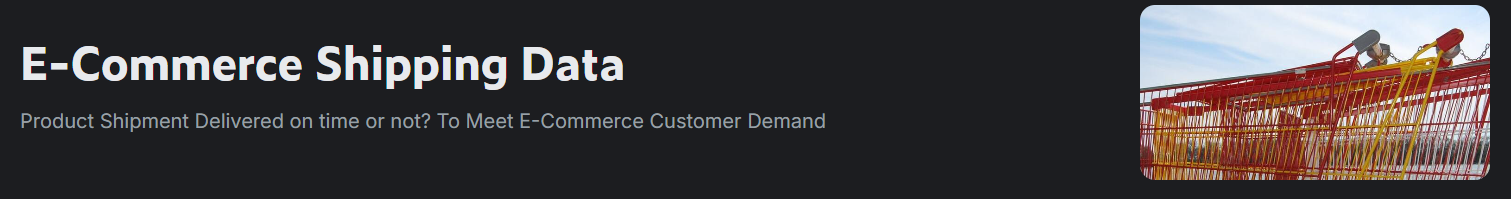

[https://www.kaggle.com/datasets/prachi13/customer-analytics/data]

# E-Commerce Shipping Data: 배송 지연 예측 및 분석

**프로젝트 개요:**
본 프로젝트는 전자상거래 배송 데이터를 분석하여 **제품의 배송 지연 여부(Reached.on.Time_Y.N)**를 예측하는 머신러닝 모델을 구축합니다. 
단순한 예측을 넘어, EDA를 통해 지연의 핵심 원인을 파악하고 파생변수를 생성하여 모델 성능을 최적화하는 과정을 담고 있습니다.

## 목차
1. [데이터셋 소개](#0-데이터셋-소개)
2. [라이브러리 임포트 & 데이터 로딩](#1-라이브러리-임포트)
3. [탐색적 데이터 분석 (EDA)](#2-탐색적-데이터-분석)
4. [시각화](#3-시각화)
5. [전처리](#4-전처리)
6. [특성 공학](#5-특성-공학)
7. [모델링](#6-모델링)
8. [하이퍼파라미터 튜닝](#7-하이퍼파라미터-튜닝)
9. [모델 평가](#8-모델-평가)

## 1. 데이터셋 소개 <a id='0-데이터셋-소개'></a>

**데이터 명세 (Data Dictionary)**
총 10,999개의 데이터와 12개의 컬럼으로 구성되어 있습니다.

| 구분 | 컬럼명 | 설명 | 데이터 타입 | 비고 |
|:---:|:---|:---|:---:|:---|
| **Target** | `Reached.on.Time_Y.N` | 배송 지연 여부 (1: 정시 도착, 0: 지연) | int64 | **Target Variable** |
| **Index** | `ID` | 고유 식별자 | int64 | 분석 시 제거 예정 |
| **Categorical** | `Warehouse_block` | 창고 구역 (A, B, C, D, F) | object | |
| | `Mode_of_Shipment` | 배송 수단 (Ship, Flight, Road) | object | |
| | `Product_importance` | 제품 중요도 (low, medium, high) | object | |
| | `Gender` | 고객 성별 (F, M) | object | |
| **Numerical** | `Customer_care_calls` | 고객센터 전화 횟수 | int64 | |
| | `Customer_rating` | 고객 만족도 (1~5) | int64 | |
| | `Cost_of_the_Product` | 제품 가격 | int64 | |
| | `Prior_purchases` | 이전 구매 횟수 | int64 | |
| | `Discount_offered` | 제공된 할인율 | int64 | **핵심 변수** |
| | `Weight_in_gms` | 제품 무게 (g) | int64 | **핵심 변수** |

## 2. 라이브러리 임포트 & 데이터 로딩 <a id='1-라이브러리-임포트'></a>

분석과 모델링에 필요한 핵심 라이브러리를 로드하고, OS 경로 호환성을 고려하여 데이터를 불러옵니다.

In [144]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [145]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. 현재 작업 경로(Current Working Directory) 가져오기
HOME = os.getcwd()

# 2. 경로 결합 (OS에 상관없이 안전하게 경로 생성)
# 구조: [현재폴더] / data / Train.csv
dataPath = os.path.join(HOME, 'data', 'Train.csv')

# 3. 데이터 읽기
try:
    df = pd.read_csv(dataPath)
    print(f"▶ 데이터 로드 성공: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("Error: 아직 폴더 구조가 안 맞아요! 위 1~3단계를 다시 확인해주세요.")

▶ 데이터 로드 성공: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [146]:
# 데이터 기본 정보 확인
print("\n▶ 데이터 정보 (Info):")
df.info()

print("\n▶ 결측치 확인:")
print(df.isnull().sum())


▶ 데이터 정보 (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB

▶ 결측치 확인:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
C

## 3. 탐색적 데이터 분석 (EDA) <a id='2-탐색적-데이터-분석'></a>

데이터의 품질을 점검하고 기초 통계량을 확인하여 전처리 방향성을 설정합니다.
- **결측치(Missing Values)** 확인
- **중복값(Duplicates)** 확인
- **기초 통계량(Statistics)** 분석

In [147]:
# 1. 데이터 요약 정보
print(f"{'='*20} [Data Info] {'='*20}")
df.info()

# 2. 결측치 및 중복값 확인
print(f"\n{'='*20} [Quality Check] {'='*20}")
null_cnt = df.isnull().sum().sum()
dup_cnt = df.duplicated().sum()
print(f"▶ 총 결측치 수 : {null_cnt}개")
print(f"▶ 중복 데이터 수: {dup_cnt}개")

# 3. 기초 통계량 확인
print(f"\n{'='*20} [Statistics] {'='*20}")
display(df.describe().T)

==================== [Data Info] ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB

==================== [Quality Check] ====================
▶ 총 결측치 수 : 0개
▶ 중복 데이터 수: 0개

===========

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


## 4. 시각화 <a id='3-시각화'></a>

**가설 검증(Hypothesis Verification)**을 중심으로 시각화를 수행합니다.
1. **상관관계 분석**: 어떤 변수가 타겟(지연)과 가장 연관이 깊은가?
2. **팀원 가설 검증**: 
    - 할인율 10% 이상일 때 지연이 발생하는가? (재고 떨이 가설)
    - 무게 구간별로 지연 패턴이 다른가?

C:\Users\User\AppData\Local\Temp\ipykernel_26296\1625770550.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df, x='Is_Clearance', y=target, ax=axes[1, 1], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_26296\1625770550.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['일반(<=10)', '행사(>10)'])


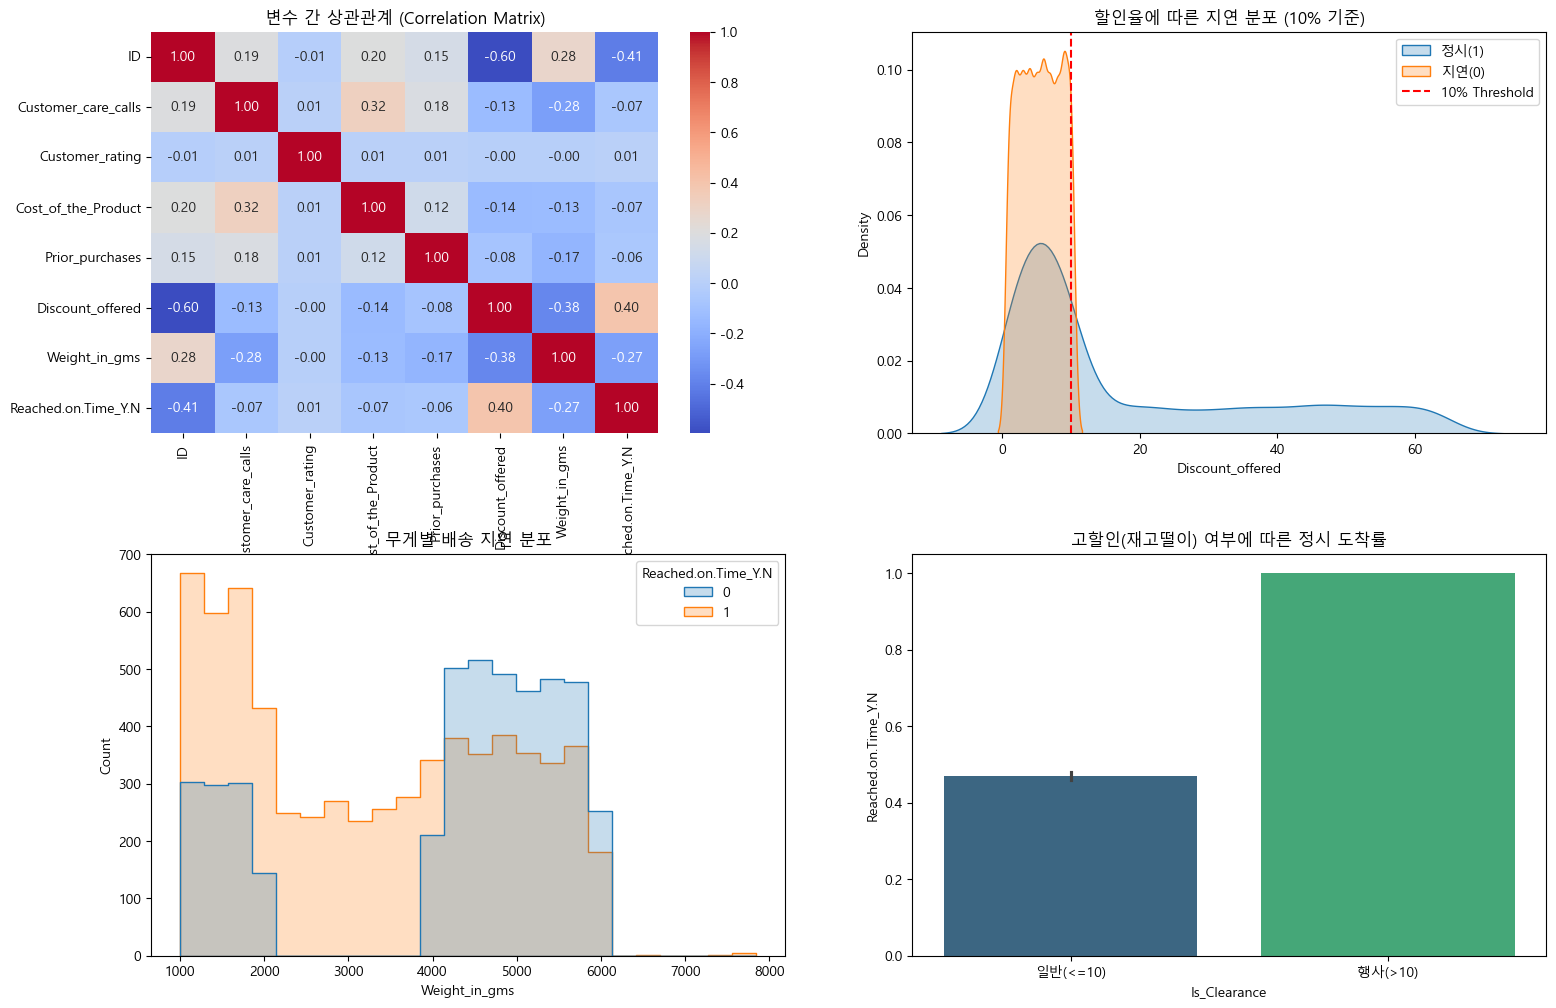

In [148]:
# 1. 타겟 변수 정의 
target = 'Reached.on.Time_Y.N'

# 2. 시각화 시작
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.3)

# [그래프 1] 상관관계 히트맵
# 수치형 변수만 골라서 상관관계 계산
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('변수 간 상관관계 (Correlation Matrix)')

# [그래프 2] 할인율(Discount) 가설 검증
sns.kdeplot(data=df[df[target]==1], x='Discount_offered', fill=True, label='정시(1)', ax=axes[0, 1])
sns.kdeplot(data=df[df[target]==0], x='Discount_offered', fill=True, label='지연(0)', ax=axes[0, 1])
axes[0, 1].axvline(10, color='red', linestyle='--', label='10% Threshold')
axes[0, 1].set_title('할인율에 따른 지연 분포 (10% 기준)')
axes[0, 1].legend()

# [그래프 3] 무게(Weight) 구간별 분포
sns.histplot(data=df, x='Weight_in_gms', hue=target, element="step", ax=axes[1, 0])
axes[1, 0].set_title('무게별 배송 지연 분포')

# [그래프 4] 재고 떨이(Clearance) 가설 증명
# 임시 변수 생성 (시각화용)
temp_df = df.copy()
temp_df['Is_Clearance'] = temp_df['Discount_offered'] > 10
sns.barplot(data=temp_df, x='Is_Clearance', y=target, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('고할인(재고떨이) 여부에 따른 정시 도착률')
axes[1, 1].set_xticklabels(['일반(<=10)', '행사(>10)'])

plt.show()

## 5. 전처리 (Preprocessing) <a id='4-전처리'></a>

본격적인 특성 공학에 앞서, 분석에 불필요한 데이터를 제거하여 데이터셋을 정제합니다.
- **ID 컬럼 제거**: 식별자 역할만 하므로 삭제

In [149]:
# 원본 데이터 복사
df_clean = df.copy()

# ID 컬럼 제거
if 'ID' in df_clean.columns:
    df_clean = df_clean.drop(columns=['ID'])
    print("▶ 'ID' 컬럼 제거 완료")

display(df_clean.head(3))

▶ 'ID' 컬럼 제거 완료


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1


## 6. 특성 공학 (Feature Engineering) <a id='5-특성-공학'></a>

EDA에서 얻은 인사이트를 바탕으로 모델 성능을 높이기 위한 파생변수를 생성하고 변환합니다.

**[적용 기법]**
1. **파생변수 생성**: `Discount_Category`, `Weight_Category`, `Final_Cost` 등
2. **인코딩(Encoding)**: 범주형 변수 -> 수치형 변환 (`LabelEncoder`)
3. **스케일링(Scaling)**: 수치형 변수 표준화 (`StandardScaler`)

**[데이터셋 분리 전략]**
- **Basic Dataset**: 기본 전처리만 수행 (Baseline용)
- **Advanced Dataset**: 파생변수 및 스케일링 모두 적용 (최종 모델용)

In [150]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def create_engineering_datasets(origin_df):
    df_basic = origin_df.copy()
    df_advanced = origin_df.copy()
    
    # 1. 불필요 컬럼 제거 (공통)
    if 'ID' in df_basic.columns:
        df_basic = df_basic.drop(columns=['ID'])
        df_advanced = df_advanced.drop(columns=['ID'])

    # 2. [Advanced] 파생변수 생성
    # - 할인율 범주화
    df_advanced['Discount_Category'] = pd.cut(df_advanced['Discount_offered'], bins=[-1, 10, 100], labels=['Low', 'High'])
    # - 무게 구간화
    df_advanced['Weight_Category'] = pd.cut(df_advanced['Weight_in_gms'], bins=[-1, 2000, 4000, 6000, 10000], labels=['Light', 'Medium', 'Heavy_1', 'Heavy_2'])
    # - 무게 대비 할인 비중
    df_advanced['Discount_Weight_Ratio'] = df_advanced['Discount_offered'] / (df_advanced['Weight_in_gms'] + 1)
    # - 최종 가격
    df_advanced['Final_Cost'] = df_advanced['Cost_of_the_Product'] * (1 - df_advanced['Discount_offered'] / 100)
    # - 중요도 대비 무게 부하
    importance_map = {'low': 1, 'medium': 2, 'high': 3}
    imp_numeric = df_advanced['Product_importance'].map(importance_map)
    df_advanced['Weight_Load_Factor'] = df_advanced['Weight_in_gms'] / imp_numeric

    # 3. 인코딩 (Label Encoding)
    le = LabelEncoder()
    for col in df_basic.select_dtypes(include='object').columns:
        df_basic[col] = le.fit_transform(df_basic[col])
        
    for col in df_advanced.select_dtypes(include=['object', 'category']).columns:
        df_advanced[col] = le.fit_transform(df_advanced[col])

    # 4. 스케일링 (Standard Scaler) - Advanced만 적용
    scaler = StandardScaler()
    num_cols = df_advanced.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'Reached.on.Time_Y.N' in num_cols:
        num_cols.remove('Reached.on.Time_Y.N')
    
    df_advanced[num_cols] = scaler.fit_transform(df_advanced[num_cols])
    
    return df_basic, df_advanced

# 함수 실행
df_basic, df_advanced = create_engineering_datasets(df)
print("▶ 데이터셋 생성 완료: Basic(Baseline용), Advanced(최종용)")

▶ 데이터셋 생성 완료: Basic(Baseline용), Advanced(최종용)


## 7. 모델링 (Modeling) <a id='6-모델링'></a>

모델링을 수행하여 성능 향상 과정을 증명합니다.

### optuna 

#### 사용 모델:
- **Logistic Regression**: 선형 모델 기반, 해석 용이
- **KNN**: 거리 기반 모델, 단순하고 직관적
- **Decision Tree**: 규칙 기반 모델, 시각화 용이
- **Random Forest**: 앙상블 배깅 방식, 과적합 방지
- **XGBoost** : 정규화 부스팅, 높은 예측 성능
- **LightGBM**: 리프 중심 학습, 빠른 속도와 저사양 최적화
- **CatBoost**: 범주형 자동 처리, 강력한 과적합 방지

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optuna
import optuna
from optuna.samplers import TPESampler

# Scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# 기본 분류기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 앙상블 분류기
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier

# XGBoost, LightGBM
try:
    from xgboost import XGBClassifier
    print("XGBoost loaded successfully")
except ImportError:
    print("XGBoost not installed. Run: pip install xgboost")

try:
    from lightgbm import LGBMClassifier
    print("LightGBM loaded successfully")
except ImportError:
    print("LightGBM not installed. Run: pip install lightgbm")

print(f"\nOptuna version: {optuna.__version__}")

XGBoost loaded successfully
LightGBM loaded successfully

Optuna version: 4.6.0


In [152]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

def evaluate_classifier(model_name, model, X_test, y_true, y_pred):
    """분류 모델 평가 및 결과 저장"""
    global results_df
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # AUC 계산 (predict_proba가 있는 경우)
    try:
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_true, y_prob)
        else:
            auc = np.nan
    except:
        auc = np.nan
    
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1],
        'AUC': [auc]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    print(f"\n{model_name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print(f"  AUC:       {auc:.4f}" if not np.isnan(auc) else "  AUC:       N/A")
    
    return

In [153]:
import warnings
from sklearn.exceptions import DataConversionWarning
# 모든 경고 무시 (권장하지 않음, 다른 중요한 경고도 놓칠 수 있음)
# warnings.filterwarnings('ignore') 
# 특정 메시지를 포함한 UserWarning만 무시
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [154]:
from sklearn.model_selection import train_test_split

X_b = df_basic.drop(columns=[target])
y_b = df_basic[target]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42, stratify=y_b)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_b)
X_test_scaled = scaler.transform(X_test_b)

print(f"학습 데이터: {X_train_scaled.shape}")
print(f"테스트 데이터: {X_test_scaled.shape}")

학습 데이터: (8799, 10)
테스트 데이터: (2200, 10)


### LogisticRegression

In [155]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective_lr(trial):
    """LogisticRegression의 objective 함수"""
    params = {
        'C': trial.suggest_float('C', 1e-4, 100, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': 'saga',  # l1, l2 모두 지원
        'max_iter': 1000,
        'random_state': 42
    }
    
    model = LogisticRegression(**params)
    
    # Stratified K-Fold 교차 검증
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_b, cv=cv, scoring='accuracy')
    
    return scores.mean()

print("=" * 50)
print("LogisticRegression 최적화 시작...")
print("=" * 50)

sampler = TPESampler(seed=42)
study_lr = optuna.create_study(direction='maximize', sampler=sampler)
study_lr.optimize(objective_lr, n_trials=50, show_progress_bar=True)

LogisticRegression 최적화 시작...


  0%|          | 0/50 [00:00<?, ?it/s]

In [156]:
# 최적화 결과 확인
print("=" * 50)
print("LogisticRegression 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study_lr.best_params}")
print(f"최고 정확도(Accuracy): {study_lr.best_value:.4f}")
print(f"총 시도 횟수: {len(study_lr.trials)}")

LogisticRegression 최적화 결과
최적 파라미터: {'C': 0.017670169402947963, 'penalty': 'l1'}
최고 정확도(Accuracy): 0.6405
총 시도 횟수: 50


In [157]:
# 최적 LogisticRegression 모델 평가
best_lr = LogisticRegression(**study_lr.best_params, solver='saga', max_iter=1000, random_state=42)
best_lr.fit(X_train_scaled, y_train_b)
pred_lr = best_lr.predict(X_test_scaled)

evaluate_classifier('LogisticRegression', best_lr, X_test_scaled, y_test_b, pred_lr)


LogisticRegression:
  Accuracy:  0.6327
  Precision: 0.6990
  Recall:    0.6756
  F1-score:  0.6871
  AUC:       0.7168


C:\Users\User\AppData\Local\Temp\ipykernel_26296\1757139907.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


### KNeighborsClassifier

In [158]:
def objective_knn(trial):
    """KNN의 objective 함수"""
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 30),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
        'n_jobs': -1
    }
    
    model = KNeighborsClassifier(**params)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_b, cv=cv, scoring='accuracy')
    
    return scores.mean()

print("=" * 50)
print("KNN 최적화 시작...")
print("=" * 50)

sampler = TPESampler(seed=42)
study_knn = optuna.create_study(direction='maximize', sampler=sampler)
study_knn.optimize(objective_knn, n_trials=50, show_progress_bar=True)

KNN 최적화 시작...


  0%|          | 0/50 [00:00<?, ?it/s]

In [159]:
print("=" * 50)
print("KNeighborsClassifier 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study_knn.best_params}")
print(f"최고 정확도(Accuracy): {study_knn.best_value:.4f}")
print(f"총 시도 횟수: {len(study_knn.trials)}")

KNeighborsClassifier 최적화 결과
최적 파라미터: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'minkowski'}
최고 정확도(Accuracy): 0.6553
총 시도 횟수: 50


In [160]:
# 최적 KNN 모델 평가
best_knn = KNeighborsClassifier(**study_knn.best_params, n_jobs=-1)
best_knn.fit(X_train_scaled, y_train_b)
pred_knn = best_knn.predict(X_test_scaled)

evaluate_classifier('KNN', best_knn, X_test_scaled, y_test_b, pred_knn)


KNN:
  Accuracy:  0.6500
  Precision: 0.7831
  Recall:    0.5720
  F1-score:  0.6611
  AUC:       0.7231


### DecisionTreeClassifier

In [161]:
def objective_dt(trial):
    """DecisionTree의 objective 함수"""
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'random_state': 42
    }
    
    model = DecisionTreeClassifier(**params)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_b, cv=cv, scoring='accuracy')
    
    return scores.mean()

print("=" * 50)
print("DecisionTree 최적화 시작...")
print("=" * 50)

sampler = TPESampler(seed=42)
study_dt = optuna.create_study(direction='maximize', sampler=sampler)
study_dt.optimize(objective_dt, n_trials=50, show_progress_bar=True)

DecisionTree 최적화 시작...


  0%|          | 0/50 [00:00<?, ?it/s]

In [162]:
print("=" * 50)
print("DecisionTreeClassifier 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study_dt.best_params}")
print(f"최고 정확도(Accuracy): {study_dt.best_value:.4f}")
print(f"총 시도 횟수: {len(study_dt.trials)}")

DecisionTreeClassifier 최적화 결과
최적 파라미터: {'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 2, 'criterion': 'entropy'}
최고 정확도(Accuracy): 0.6855
총 시도 횟수: 50


In [163]:
# 최적 DecisionTree 모델 평가
best_dt = DecisionTreeClassifier(**study_dt.best_params, random_state=42)
best_dt.fit(X_train_scaled, y_train_b)
pred_dt = best_dt.predict(X_test_scaled)

evaluate_classifier('DecisionTree', best_dt, X_test_scaled, y_test_b, pred_dt)


DecisionTree:
  Accuracy:  0.6791
  Precision: 0.9705
  Recall:    0.4768
  F1-score:  0.6394
  AUC:       0.7373


### Random Forest

In [164]:
def objective_rf(trial):
    """RandomForest의 objective 함수"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestClassifier(**params)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_b, cv=cv, scoring='accuracy')
    
    return scores.mean()
    
print("=" * 50)
print("RandomForest 최적화 시작...")
print("=" * 50)

sampler = TPESampler(seed=42)
study_rf = optuna.create_study(direction='maximize', sampler=sampler)
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

RandomForest 최적화 시작...


  0%|          | 0/50 [00:00<?, ?it/s]

In [165]:
print("=" * 50)
print("Random Forest 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study_rf.best_params}")
print(f"최고 정확도(Accuracy): {study_rf.best_value:.4f}")
print(f"총 시도 횟수: {len(study_rf.trials)}")

Random Forest 최적화 결과
최적 파라미터: {'n_estimators': 213, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': None}
최고 정확도(Accuracy): 0.6845
총 시도 횟수: 50


In [166]:
# 최적 RandomForest 모델 평가
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train_scaled, y_train_b)
pred_rf = best_rf.predict(X_test_scaled)

evaluate_classifier('RandomForest', best_rf, X_test_scaled, y_test_b, pred_rf)


RandomForest:
  Accuracy:  0.6782
  Precision: 0.9535
  Recall:    0.4844
  F1-score:  0.6424
  AUC:       0.7491


### XGBClassifier

In [167]:
def objective_xgb(trial):
    """XGBoost의 objective 함수"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 10, log=True),
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': 0,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**params)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_b, cv=cv, scoring='accuracy')
    
    return scores.mean()

print("=" * 50)
print("XGBoost 최적화 시작...")
print("=" * 50)

sampler = TPESampler(seed=42)
study_xgb = optuna.create_study(direction='maximize', sampler=sampler)
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)

XGBoost 최적화 시작...


  0%|          | 0/50 [00:00<?, ?it/s]

In [168]:
print("=" * 50)
print("XGBClassifier 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study_xgb.best_params}")
print(f"최고 정확도(Accuracy): {study_xgb.best_value:.4f}")
print(f"총 시도 횟수: {len(study_xgb.trials)}")

XGBClassifier 최적화 결과
최적 파라미터: {'n_estimators': 133, 'learning_rate': 0.017984895639451028, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.6184129734641783, 'colsample_bytree': 0.7334176128825918, 'reg_alpha': 0.019873997596456156, 'reg_lambda': 0.00010154365646718392}
최고 정확도(Accuracy): 0.6874
총 시도 횟수: 50


In [169]:
# 최적 XGBoost 모델 평가
best_xgb = XGBClassifier(**study_xgb.best_params, random_state=42, n_jobs=-1, 
                         verbosity=0, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train_scaled, y_train_b)
pred_xgb = best_xgb.predict(X_test_scaled)

evaluate_classifier('XGBoost', best_xgb, X_test_scaled, y_test_b, pred_xgb)


XGBoost:
  Accuracy:  0.6791
  Precision: 0.9510
  Recall:    0.4874
  F1-score:  0.6445
  AUC:       0.7545


### LGBMClassifier 

In [170]:
def objective_lgbm(trial):
    """LightGBM의 objective 함수"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 10, log=True),
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': -1
    }
    
    model = LGBMClassifier(**params)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_b, cv=cv, scoring='accuracy')
    
    return scores.mean()

print("=" * 50)
print("LightGBM 최적화 시작...")
print("=" * 50)

sampler = TPESampler(seed=42)
study_lgbm = optuna.create_study(direction='maximize', sampler=sampler)
study_lgbm.optimize(objective_lgbm, n_trials=50, show_progress_bar=True)

LightGBM 최적화 시작...


  0%|          | 0/50 [00:00<?, ?it/s]

In [171]:
print("=" * 50)
print("LGBMClassifier 최적화 결과")
print("=" * 50)
print(f"최적 파라미터: {study_xgb.best_params}")
print(f"최고 정확도(Accuracy): {study_xgb.best_value:.4f}")
print(f"총 시도 횟수: {len(study_xgb.trials)}")

LGBMClassifier 최적화 결과
최적 파라미터: {'n_estimators': 133, 'learning_rate': 0.017984895639451028, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.6184129734641783, 'colsample_bytree': 0.7334176128825918, 'reg_alpha': 0.019873997596456156, 'reg_lambda': 0.00010154365646718392}
최고 정확도(Accuracy): 0.6874
총 시도 횟수: 50


In [172]:
# 최적 LightGBM 모델 평가
best_lgbm = LGBMClassifier(**study_lgbm.best_params, random_state=42, n_jobs=-1, verbosity=-1)
best_lgbm.fit(X_train_scaled, y_train_b)
pred_lgbm = best_lgbm.predict(X_test_scaled)

evaluate_classifier('LightGBM', best_lgbm, X_test_scaled, y_test_b, pred_lgbm)


LightGBM:
  Accuracy:  0.6773
  Precision: 0.9548
  Recall:    0.4821
  F1-score:  0.6407
  AUC:       0.7566


### 결과 분석

모델 성능 비교

In [173]:
# 전체 결과 출력
print("=" * 70)
print("분류 모델 성능 비교 결과")
print("=" * 70)

results_sorted = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
display(results_sorted)

분류 모델 성능 비교 결과


,Model,Accuracy,Precision,Recall,F1,AUC
0,XGBoost,0.679091,0.950966,0.487433,0.644512,0.754473
1,DecisionTree,0.679091,0.970543,0.476771,0.639428,0.737325
2,RandomForest,0.678182,0.953523,0.484387,0.642424,0.749072
3,LightGBM,0.677273,0.954751,0.482102,0.640688,0.756592
4,KNN,0.650000,0.783107,0.571973,0.661092,0.723111
5,LogisticRegression,0.632727,0.698976,0.675552,0.687064,0.716820


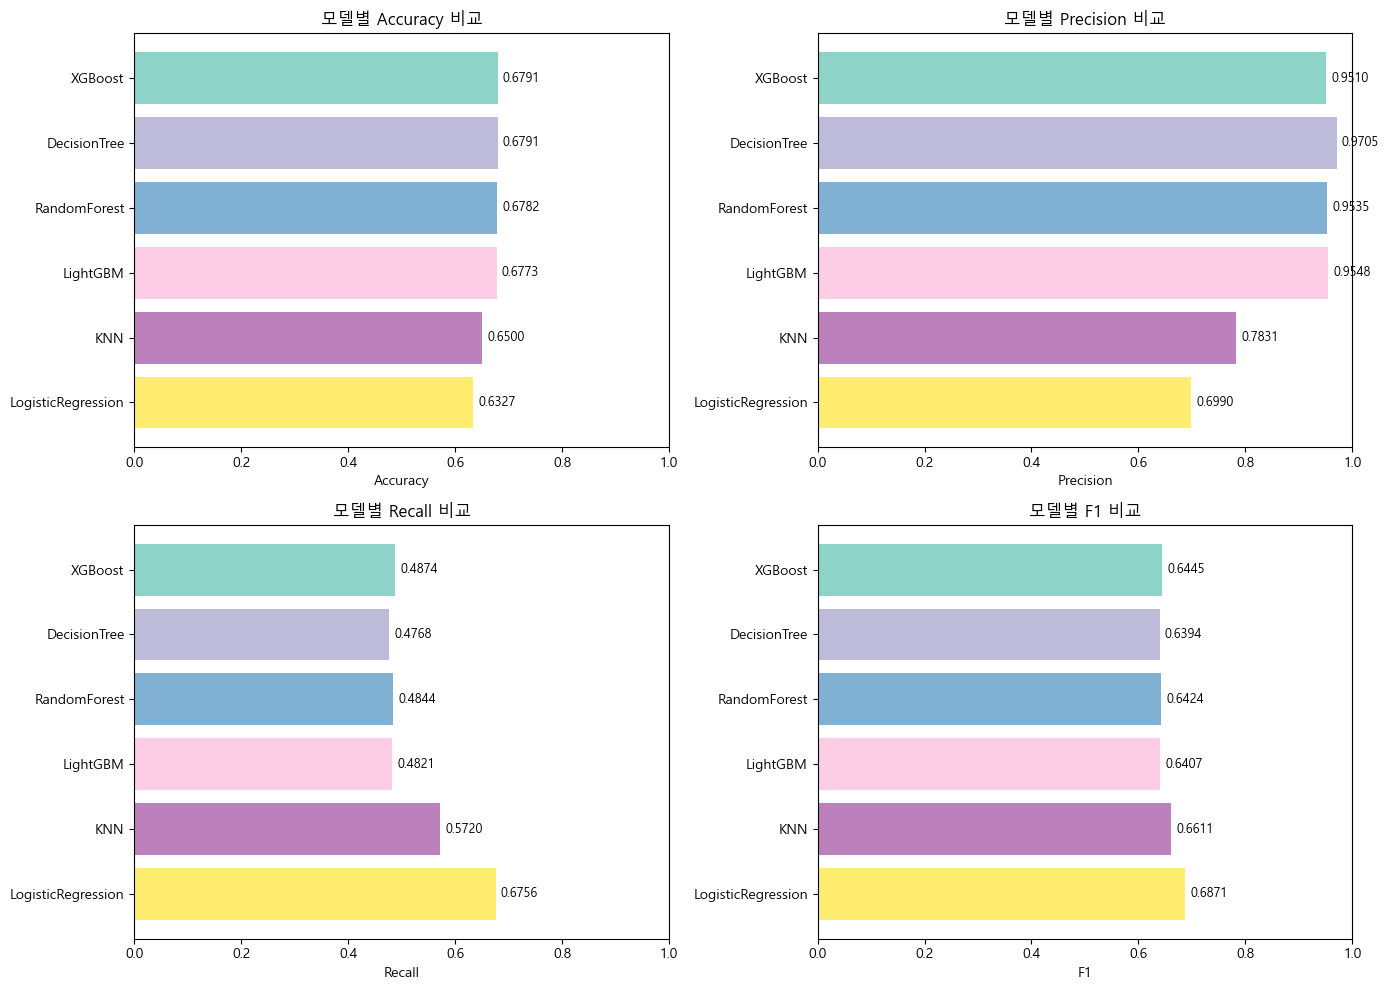

<Figure size 640x480 with 0 Axes>

In [174]:
# 성능 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
colors = plt.cm.Set3(np.linspace(0, 1, len(results_sorted)))

for ax, metric in zip(axes.flatten(), metrics):
    bars = ax.barh(results_sorted['Model'], results_sorted[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'모델별 {metric} 비교')
    
    ax.set_xlim([0, 1.0])
    
    ax.invert_yaxis()
    
    for i, v in enumerate(results_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

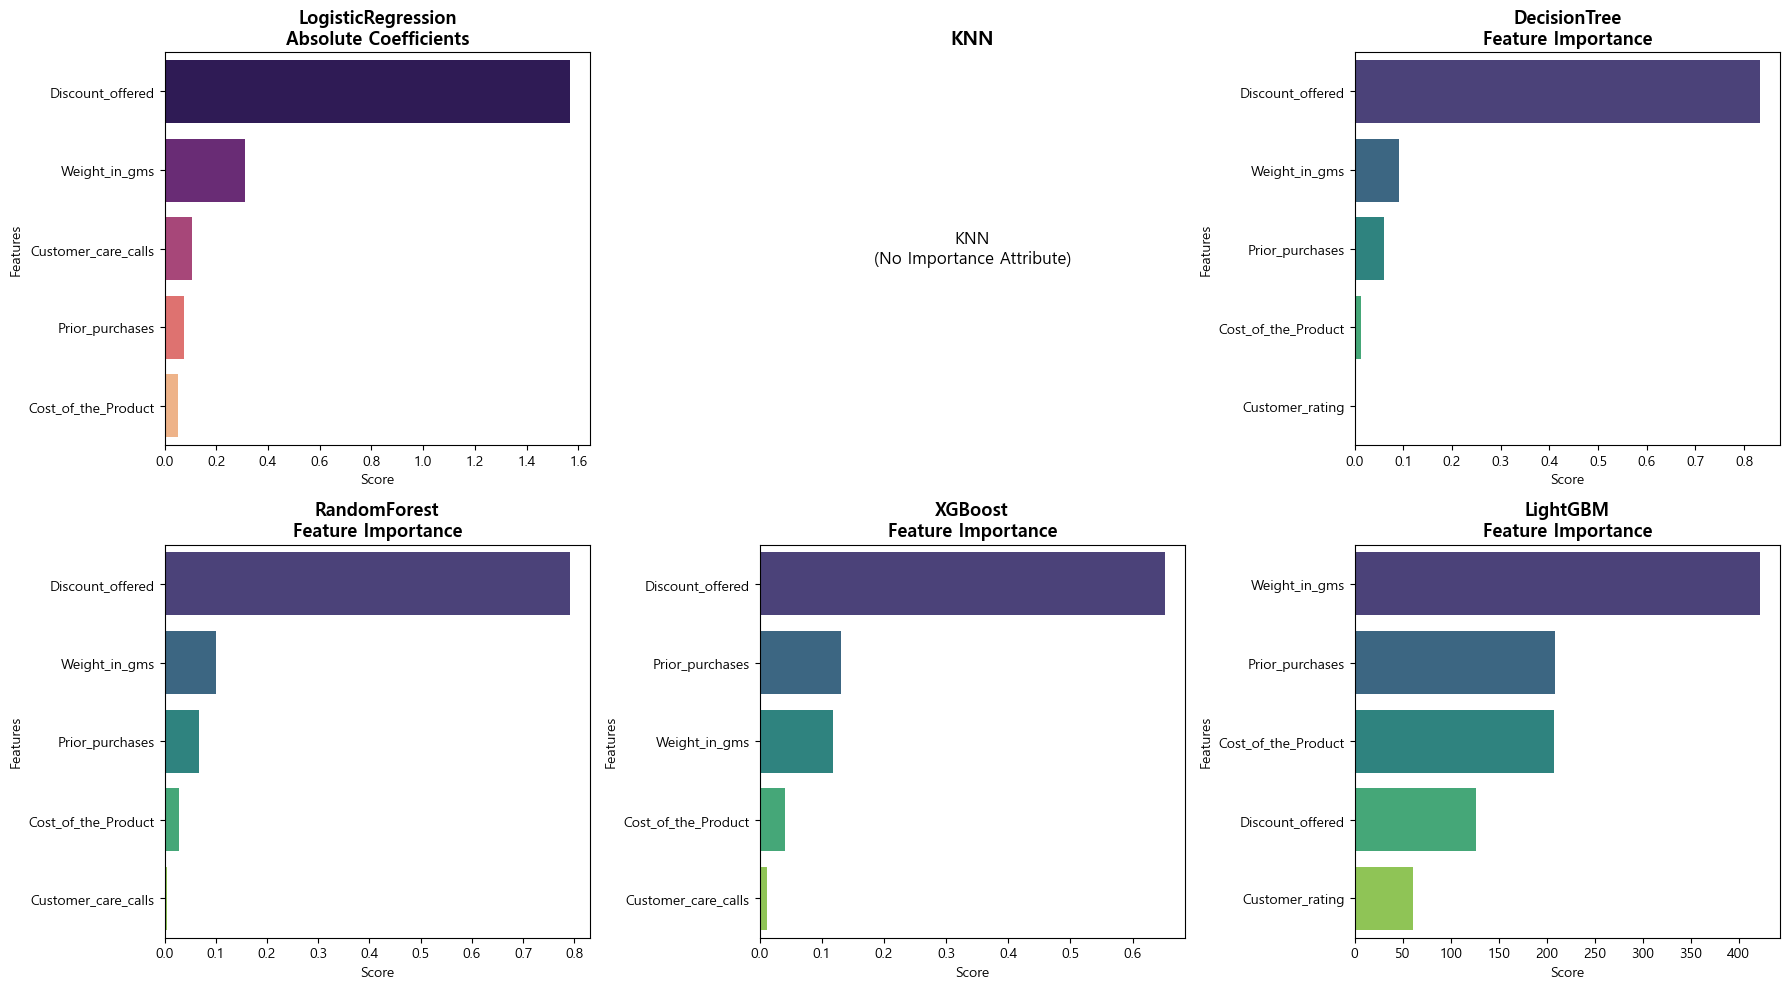

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시각화할 '최적화된 모델 객체' 리스트
models_to_plot = [
    ('LogisticRegression', best_lr),
    ('KNN', best_knn),
    ('DecisionTree', best_dt),
    ('RandomForest', best_rf),
    ('XGBoost', best_xgb),
    ('LightGBM', best_lgbm),
]

# 2. 2x3 서브플롯 설정
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes_flat = axes.flatten()

for i, (name, model) in enumerate(models_to_plot):
    ax = axes_flat[i]
    
    try:
        # A. 나무 기반 모델 (DT, RF, XGB, LGBM)
        if hasattr(model, 'feature_importances_'):
            importances = pd.Series(model.feature_importances_, index=X_train_b.columns)
            title_suffix = "Feature Importance"
            palette = 'viridis'
            
        # B. 선형 모델 (Logistic Regression)
        elif hasattr(model, 'coef_'):
            # 계수의 절대값을 사용하여 중요도 파악
            importances = pd.Series(np.abs(model.coef_[0]), index=X_train_b.columns)
            title_suffix = "Absolute Coefficients"
            palette = 'magma'
            
        # C. 중요도 개념이 없는 모델 (KNN 등)
        else:
            ax.text(0.5, 0.5, f'{name}\n(No Importance Attribute)', 
                    ha='center', va='center', fontsize=12)
            ax.set_title(f'{name}', fontsize=14, fontweight='bold')
            ax.axis('off')
            continue

        # 상위 5개 추출 및 시각화
        top5 = importances.sort_values(ascending=False).head(5)
        sns.barplot(x=top5.values, y=top5.index, ax=ax, palette=palette, hue=top5.index, legend=False)
        
        ax.set_title(f'{name}\n{title_suffix}', fontsize=13, fontweight='bold')
        ax.set_xlabel('Score')
        ax.set_ylabel('Features')

    except Exception as e:
        ax.text(0.5, 0.5, f'Error plotting {name}', ha='center', va='center')
        ax.axis('off')

# 남은 빈 axes 숨기기
for j in range(len(models_to_plot), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()
plt.show()

KNN (K-Nearest Neighbors): "가장 가까운 $K$개의 이웃이 무엇인가"를 거리(Distance)로만 판단합니다.

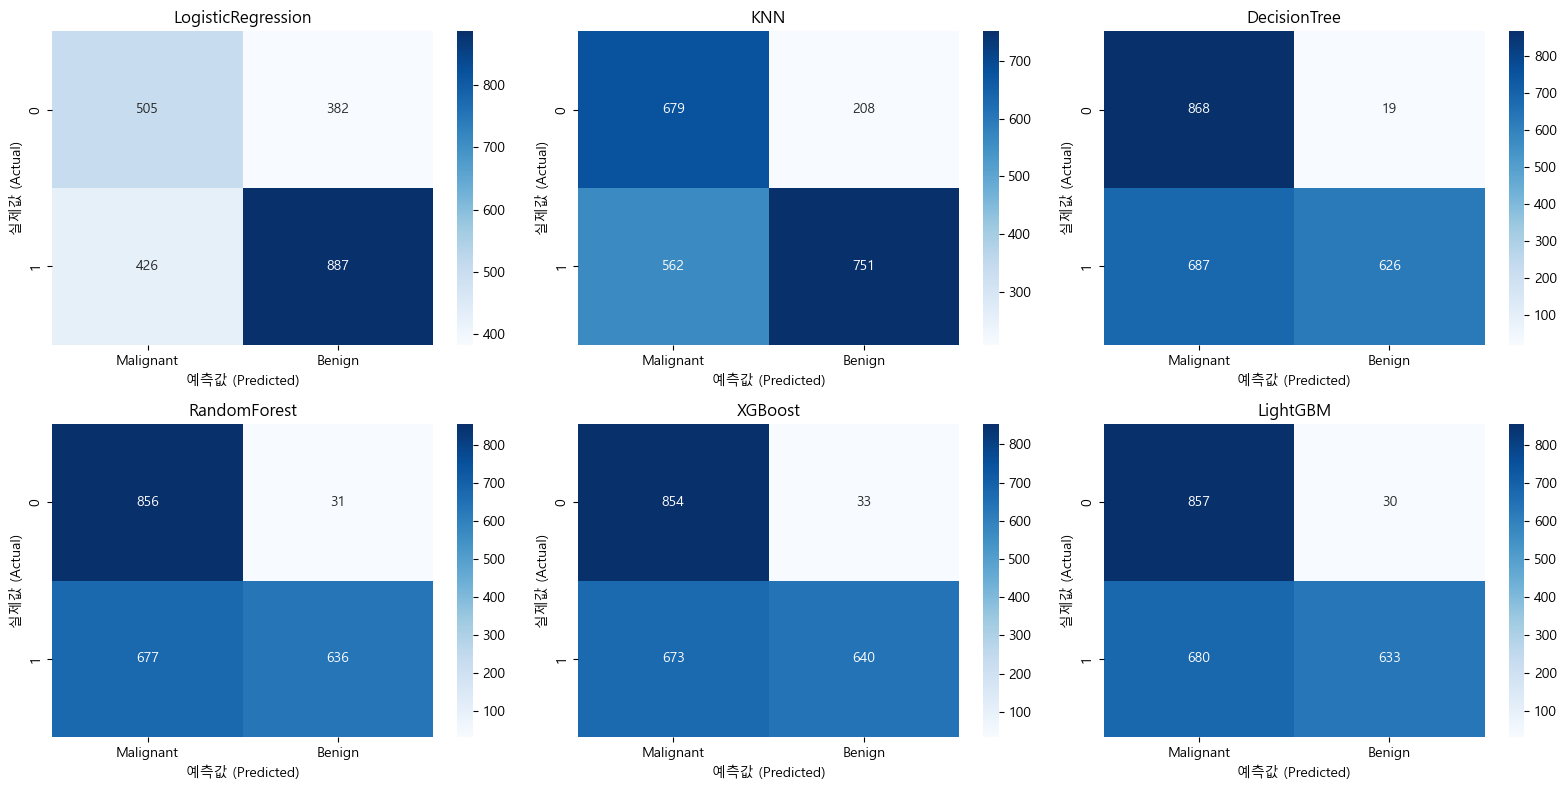

In [ ]:
# 모델의 혼동 행렬 시각화
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

models_preds = [
    ('LogisticRegression', pred_lr),
    ('KNN', pred_knn),
    ('DecisionTree', pred_dt),
    ('RandomForest', pred_rf),
    ('XGBoost', pred_xgb),
    ('LightGBM', pred_lgbm),
]

# 상위 모델 선택 (axes 개수에 맞춤)
for ax, (name, pred) in zip(axes.flatten()[:len(models_preds)], models_preds):
    cm = confusion_matrix(y_test_b, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['정시(0)', '지연(1)'],
                yticklabels=['정시(0)', '지연(1)'])

                # 0: 정시, 1: 지연
    ax.set_title(f'{name}')
    ax.set_ylabel('실제값 (Actual)')
    ax.set_xlabel('예측값 (Predicted)')


# 빈 axes 숨기기
for ax in axes.flatten()[len(models_preds):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### AutoGluon

In [177]:
# 합치기
train_data = pd.concat([X_train_b, y_train_b], axis=1)
test_data = pd.concat([X_test_b, y_test_b], axis=1)

print(f'학습 데이터 크기: {train_data.shape}')
print(f'검증 데이터 크기: {test_data.shape}')

학습 데이터 크기: (8799, 11)
검증 데이터 크기: (2200, 11)


In [178]:
import numpy as np
import random
from autogluon.tabular import TabularPredictor

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label= target,                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='accuracy',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       0.74 GB / 7.86 GB (9.5%)
Disk Space Avail:   104.30 GB / 237.43 GB (43.9%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'


Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 10
Tuning Data Rows:    2200
Tuning Data Columns: 10
Label Column:       Reached.on.Time_Y.N
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    723.41 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Ge

In [182]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val    fit_time
0   WeightedEnsemble_L2   0.691364  196.218732
1              CatBoost   0.685000    6.822352
2        NeuralNetTorch   0.683182  173.926227
3            LightGBMXT   0.683182    3.304471
4       NeuralNetFastAI   0.680000   83.837227
5               XGBoost   0.678182    1.321911
6              LightGBM   0.675000    2.223609
7      RandomForestGini   0.662273    5.216397
8        ExtraTreesEntr   0.660455    4.538627
9      RandomForestEntr   0.655000    4.859248
10       ExtraTreesGini   0.654545    6.244481


In [183]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop( target, axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test_b, val_predictions)
precision = precision_score(y_test_b, val_predictions)
recall = recall_score(y_test_b, val_predictions)
f1 = f1_score(y_test_b, val_predictions)
auc = roc_auc_score(y_test_b, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC:       {auc:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6914
Precision (정밀도): 0.8962
Recall (재현율): 0.5461
F1 Score: 0.6787
AUC:       0.7263


Computing feature importance via permutation shuffling for 10 features using 2200 rows with 5 shuffle sets...


=== 특성 중요도 ===


	147.86s	= Expected runtime (29.57s per shuffle set)
	29.63s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_in_gms,0.074091,0.016058,0.000249,5,0.107154,0.041028
Discount_offered,0.028636,0.010285,0.001695,5,0.049814,0.007459
Customer_rating,0.013182,0.002405,0.000127,5,0.018134,0.008229
Product_importance,0.013091,0.003392,0.000496,5,0.020076,0.006106
Customer_care_calls,0.011727,0.002304,0.000170,5,0.016472,0.006983


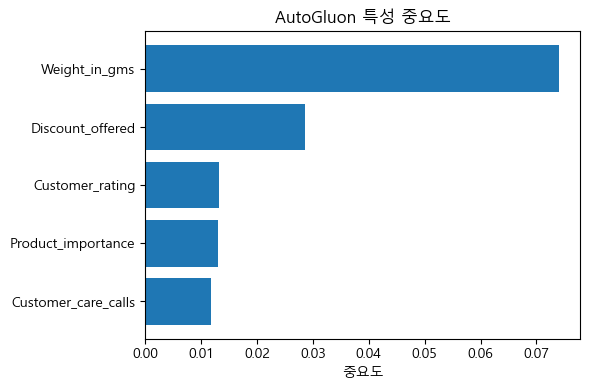

In [180]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data).head(5)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(6, 4))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

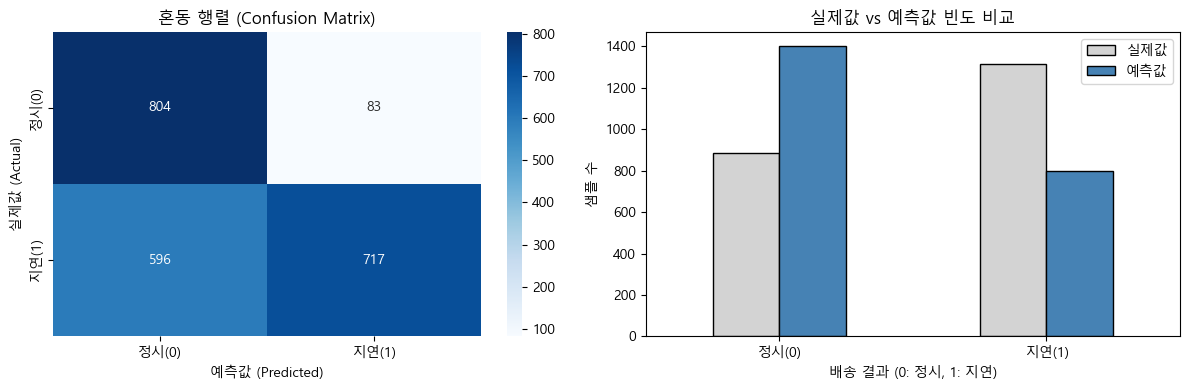

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1521
- 정확도(Accuracy): 0.6914


In [186]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop( target, axis=1))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test_b, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['정시(0)', '지연(1)'],
                yticklabels=['정시(0)', '지연(1)'])
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test_b.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test_b == best_predictions).sum()
total = len(y_test_b)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### optuna , AutoGluon 성능 비교

| 구분 | 최고 모델 | Accuracy (정확도) | F1 Score | Precision | Recall | AUC |
|:---:|:---|:---|:---:|:---|:---|:---|
| **optuna** | `XGBoost` | 0.6791 | 0.6445 | 0.9510 | 0.4874 | 0.7545 |
| **AutoGluon** | `WeightedEnsemble_L2` | 0.6914 | 0.6787 | 0.8962 | 0.5461 | 0.7263 |

Text(0.5, 1.0, 'optuna')

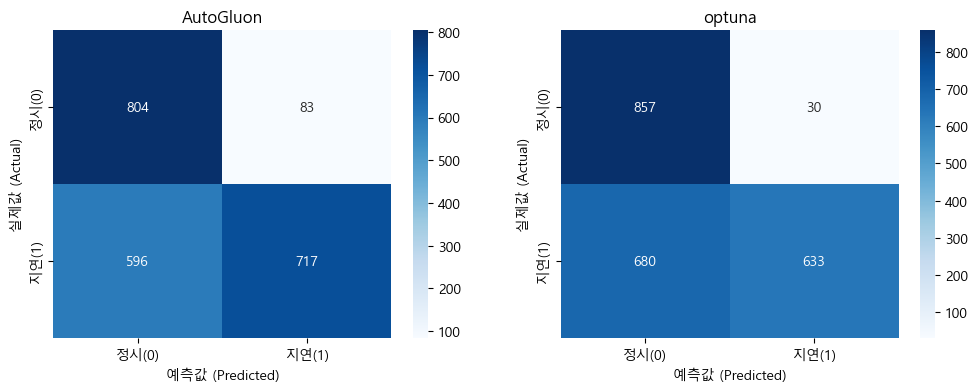

In [185]:
# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop( target, axis=1))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test_b, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['정시(0)', '지연(1)'],
                yticklabels=['정시(0)', '지연(1)'])
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('AutoGluon')


models_preds = ('XGBoost', pred_xgb)

cm = confusion_matrix(y_test_b, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
                xticklabels=['정시(0)', '지연(1)'],
                yticklabels=['정시(0)', '지연(1)'])
axes[1].set_xlabel('예측값 (Predicted)')
axes[1].set_ylabel('실제값 (Actual)')
axes[1].set_title('optuna')